# 회귀분석 일괄처리

sklearn 기반 선형회귀 분석 모형 정의 및 성능 평가와 결과보고를 수행하는 전처리 코드 작성하기

## #01. 준비작업

### [1] 패키지 참조

> start.py 파일을 정의한 경우 생략 가능함

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

from pandas import read_excel, DataFrame
from tabulate import tabulate

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy.stats import t, f

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin = read_excel("C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/fish.xlsx")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB
None


,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


## #02. 데이터 전처리

### [1] 데이터 스케일링

앞 예제에서 VIF 값을 확인한 결과 요인들간의 다중공선성이 강하게 발생하는 것을 확인할 수 있었다.

이 경우 요인에 대한 스케일링을 적용하면 다중공선성 문제를 완화시킬 수 있다.

In [4]:
scaler = StandardScaler()
df = DataFrame(scaler.fit_transform(origin), index=origin.index, columns=origin.columns)
df.head()

,길이,높이,두께,무게
0,-2.180225,-2.016507,-1.896175,-1.092422
1,-1.587434,-1.518703,-1.560774,-1.016660
2,-1.442032,-1.417039,-1.316328,-0.993438
3,-1.307815,-1.147103,-1.202633,-0.960056
4,-1.173599,-1.147103,-1.026405,-0.906355


In [18]:
yname = '무게'
x = df.drop('무게', axis=1)
y = df[yname]
xnames = list(x.columns)
print(y)

0    -1.092422
1    -1.016660
2    -0.993438
3    -0.960056
4    -0.906355
5    -0.819272
6    -0.883133
7    -0.877327
8    -0.862814
9    -0.862814
10   -0.790245
11   -0.775731
12   -0.746703
13   -0.732189
14   -0.761217
15   -0.761217
16   -0.732189
17   -0.717676
18   -0.790245
19   -0.732189
20   -0.674134
21   -0.688648
22   -0.674134
23   -0.616079
24   -0.456428
25   -0.688648
26   -0.563830
27   -0.587052
28   -0.537705
29   -0.476747
30   -0.238721
31   -0.354831
32   -0.340317
33   -0.383859
34   -0.383859
35   -0.238721
36   -0.180666
37    0.382469
38    0.504385
39    1.328768
40    0.878841
41    0.922382
42    0.922382
43    0.893355
44    1.502934
45    0.777244
46    1.270713
47    1.357796
48    1.502934
49    1.836751
50    1.270713
51    2.083485
52    1.793210
53    2.083485
54    1.793210
55    1.793210
Name: 무게, dtype: float64


## #03. 선형회귀를 위한 일괄 처리 코드 구현

훈련결과 시각화


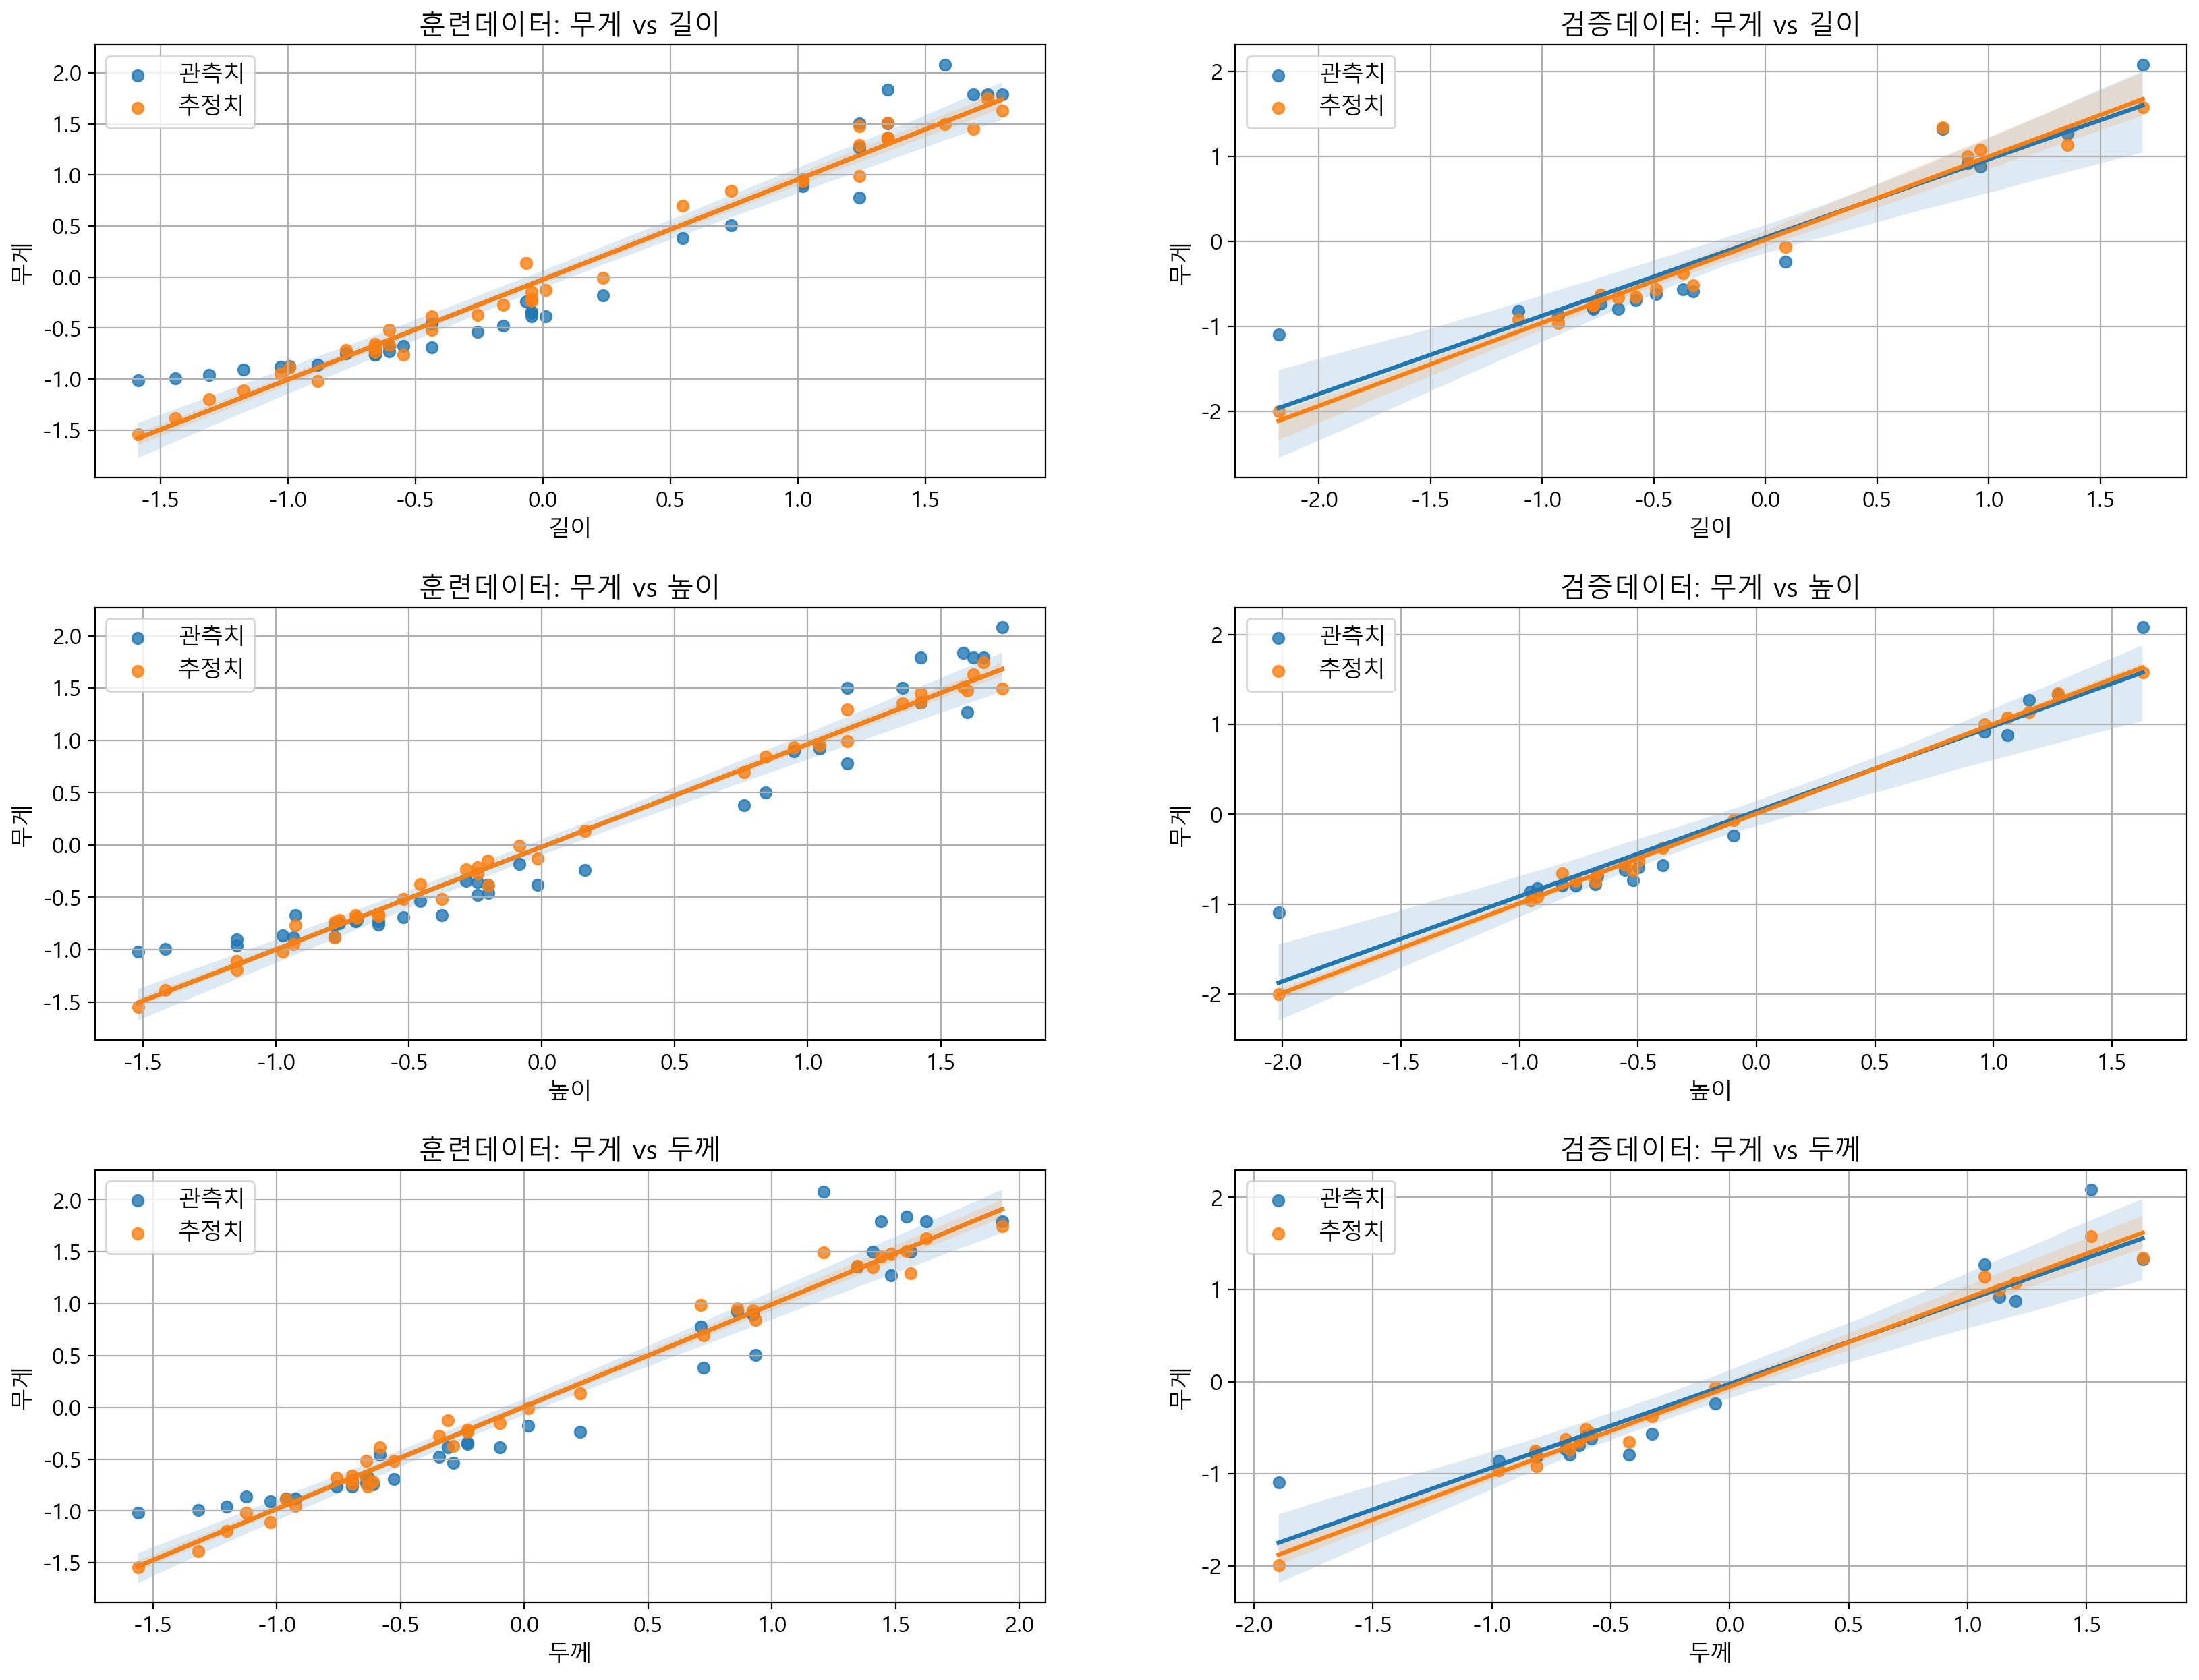

[성능지표]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.949944 |     0.919246 |
| 평균절대오차(MAE)             |      0.17963 |     0.169193 |
| 평균제곱오차(MSE)             |    0.0513092 |    0.0743921 |
| 평균오차(RMSE)                |     0.226515 |     0.272749 |
| 평균 절대 백분오차 비율(MAPE) |      28.4108 |      20.4653 |
| 평균 비율 오차(MPE)           |      8.90046 |      4.23781 |
+-------------------------------+--------------+--------------+

회귀식
무게 = 0.160 * 길이 + 0.474 * 높이 + 0.359 * 두께 + -0.011

[훈련데이터에 대한 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |     t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+-------+------------+---------|
|

ValueError: array length 17 does not match index length 56

In [19]:
# --------------------------------------
# 1. 데이터 분할
# --------------------------------------
yname = '무게'
x = df.drop('무게', axis=1)
y = df[yname]
xnames = list(x.columns)
#print(xnames)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# --------------------------------------
# 2. 회귀분석
# --------------------------------------
# 분석 모델 생성
model = LinearRegression(n_jobs=-1)
fit = model.fit(x_train, y_train)
#fit

# --------------------------------------
# 3. 훈련, 검증 데이터에 대한 예측치
# --------------------------------------
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)
#print(y_train_pred.shape, y_test_pred.shape)

# --------------------------------------
# 4. 시각화 및 성능지표 계산
# --------------------------------------
# 반복 수행을 위해 훈련/검증 데이터를 하나로 묶음
target = [[x_train, y_train, y_train_pred],[x_test, y_test, y_test_pred]]

# 성능지표 저장용 리스트
result_data = []

# 시각화 시작
print('훈련결과 시각화')
size = len(xnames)

fig, ax = plt.subplots(len(xnames),2,figsize=(20,5*size),dpi=200)
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(target):
    # v[0] -> x, v[1] -> y, v[2] -> pred
    result = {
        '결정계수(R2)': r2_score(v[1], v[2]),
        "평균절대오차(MAE)": mean_absolute_error(v[1], v[2]),
        "평균제곱오차(MSE)": mean_squared_error(v[1], v[2]),
        "평균오차(RMSE)": np.sqrt(mean_squared_error(v[1], v[2])),
        "평균 절대 백분오차 비율(MAPE)": np.mean(np.abs((v[1] - v[2]) / v[1]) * 100),
        "평균 비율 오차(MPE)": np.mean((v[1] - v[2]) / v[1] * 100)
    }

    result_data.append(result)

    # 서브플롯에서 바깥의 반복문이 열을 담당하도록 구성하였으므로, 내부 반복문은 행(변수 종류별)을 담당

    for j,w in enumerate(xnames):
        sb.regplot(x=v[0][w], y = v[1], ci=95, ax = ax[j][i], label='관측치')
        sb.regplot(x=v[0][w], y = v[2], ci=95, ax = ax[j][i], label='추정치')
        ax[j][i].set_title(f'훈련데이터: {yname} vs {w}' if i == 0 else f'검증데이터: {yname} vs {w}')
        ax[j][i].grid(True)
        ax[j][i].legend()

plt.show()
plt.close()

result_df = DataFrame(result_data, index = ['훈련데이터', '검증데이터']) 
print('[성능지표]')
print(tabulate(result_df.T, headers='keys', tablefmt='psql',
                      showindex=True, numalign='right'), end='\n\n')


# --------------------------------------
# 5. 회귀식 도출
# --------------------------------------
expr = '{yname} = '.format(yname=yname)

for i, v in enumerate(xnames):
    expr += '%0.3f * %s + ' % (fit.coef_[i], v)

expr += '%0.3f' % fit.intercept_
print('회귀식')
print(expr, end='\n\n')


# --------------------------------------
# 6. 결과보고
# --------------------------------------

for i, v in enumerate(target):
    print('[훈련데이터에' if i == 0 else '[검증데이터에', '대한 결과보고]')

    target_x = v[0]
    target_y = v[1]
    target_y_pred = v[2]

    # 잔차
    resid = target_y - target_y_pred

    # 절편과 계수를 하나의 배열로 결합
    params = np.append(fit.intercept_,fit.coef_)

    # 검증용 독립변수에 상수항 추가
    design_x = target_x.copy()
    design_x.insert(0, '상수', 1)

    dot = np.dot(design_x.T, design_x)
    inv = np.linalg.inv(dot)
    dia = inv.diagonal()

        # 제곱오차
    MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

    se_b = np.sqrt(MSE * dia)           # 표준오차
    ts_b = params / se_b                # t값

# 각 독립수에 대한 pvalue
    p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

    # VIF
    vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for i, v in enumerate(target_x.columns)]

    # 표준화 계수
    train_df = target_x.copy()
    train_df[target_y.name] = target_y
    scaler = StandardScaler()
    std = scaler.fit_transform(train_df)
    std_df = DataFrame(std, columns=train_df.columns)
    std_x = std_df[xnames]
    std_y = std_df[yname]
    std_model = LinearRegression(n_jobs=-1)
    std_fit = std_model.fit(std_x, std_y)
    beta = std_fit.coef_

    # 결과표 구성하기
    result_df = DataFrame({
        "종속변수": [yname] * len(xnames),
        "독립변수": xnames,
        "B(비표준화 계수)": np.round(params[1:], 4),
        "표준오차": np.round(se_b[1:], 3),
        "β(표준화 계수)": np.round(beta, 3),
        "t": np.round(ts_b[1:], 3),
        "유의확률": np.round(p_values[1:], 3),
        "VIF": vif,
    })

#result_df
    print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

    resid = target_y - target_y_pred        # 잔차
    dw = durbin_watson(resid)               # 더빈 왓슨 통계량
    r2 = r2_score(target_y, target_y_pred)  # 결정계수(설명력)
    rowcount = len(target_x)                # 표본수
    featurecount = len(target_x.columns)    # 독립변수의 수

    # 보정된 결정계수
    adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

    # f값
    f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

    # Prob (F-statistic)
    p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

    tpl = "𝑅^2(%.3f), Adj.𝑅^2(%.3f), F(%.3f), P-value(%.4g), Durbin-Watson(%.3f)"
    print(tpl % (r2, adj_r2, f_statistic, p, dw), end="\n\n")

    # 결과보고
    tpl = "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %0.3f, p %s 0.05)."

    print(tpl % (
        yname,
        ",".join(xnames),
        "유의하다" if p <= 0.05 else "유의하지 않다",
        len(target_x.columns),
        len(target_x.index)-len(target_x.columns)-1,
        f_statistic,
        "<=" if p <= 0.05 else ">"), end="\n\n")

    # 독립변수 보고
    for n in xnames:
        item = result_df[result_df['독립변수'] == n]
        coef = item['B(비표준화 계수)'].values[0]
        pvalue = item['유의확률'].values[0]

        s = "%s의 회귀계수는 %0.3f(p %s 0.05)로, %s에 대하여 %s."
        k = s % (n,
                coef,
                "<=" if pvalue <= 0.05 else '>',
                yname,
                '유의미한 예측변인인 것으로 나타났다' if pvalue <= 0.05 else '유의하지 않은 예측변인인 것으로 나타났다'
        )

        print(k)

    print("")